# Imbalanced Dataset Experiments - CNN vs Vision Transformer

This notebook runs experiments comparing CNN (ResNet) and Vision Transformer (ViT) on imbalanced CIFAR10 datasets.

## Step 1: Setup and Install Dependencies

In [1]:
# Install required packages
!pip install torch torchvision torchmetrics pyyaml matplotlib seaborn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 10.2 MB/s eta 0:00:00


In [7]:
import os

# Check for required files
required_files = [
    'CNN.py',
    'VisionTransormer.py',
    'config.yaml',
    'imbalanced-exp/create_imbalanced_dataset.py',
    'imbalanced-exp/evaluate.py',
    'imbalanced-exp/run_imbalanced_experiment.py',
    'cka/metrics.py'
]

print("Checking required files...")
for file in required_files:
    if os.path.exists(file):
        print(f"✓ {file}")
    else:
        print(f"✗ {file} - MISSING!")

print("\nFile check complete!")

Checking required files...
✓ CNN.py
✓ VisionTransormer.py
✓ config.yaml
✓ imbalanced-exp/create_imbalanced_dataset.py
✓ imbalanced-exp/evaluate.py
✓ imbalanced-exp/run_imbalanced_experiment.py
✓ cka/metrics.py

File check complete!


## Step 4: Run Imbalanced Dataset Experiment

Run the experiment with default settings (long-tail imbalance, ratio=0.1, 10 epochs):

In [8]:
import sys
import os

# Change to imbalanced-exp directory
os.chdir('imbalanced-exp')

# Run experiment
!python run_imbalanced_experiment.py \
    --imbalance_type long_tail \
    --imbalance_ratio 0.1 \
    --num_epochs 10 \
    --config ../config.yaml \
    --output_dir ./results

Using device: cuda
100% 170M/170M [00:10<00:00, 15.6MB/s]

Creating long_tail imbalanced dataset with ratio 0.1...
Class distribution (long-tail):
  Class 0: 5000 samples
  Class 1: 3871 samples
  Class 2: 2997 samples
  Class 3: 2320 samples
  Class 4: 1796 samples
  Class 5: 1391 samples
  Class 6: 1077 samples
  Class 7: 834 samples
  Class 8: 645 samples
  Class 9: 500 samples

Training CNN (ResNet)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:00<00:00, 169MB/s]
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=

## Step 5: Run with Custom Parameters

You can customize the experiment parameters:

In [ ]:
# Example: Step imbalance with different ratio
# !python run_imbalanced_experiment.py \
#     --imbalance_type step \
#     --imbalance_ratio 0.05 \
#     --num_epochs 15 \
#     --config ../config.yaml \
#     --output_dir ./results

## Step 6: View Results

Display the generated plots and results:

Latest experiment: results/imbalanced_long_tail_0.1_20251201_175508

Experiment Results:
CNN Accuracy: 43.40%
ViT Accuracy: 23.10%
CNN F1-Macro: 0.3843
ViT F1-Macro: 0.1379

Displaying confusion_matrix_cnn.png:


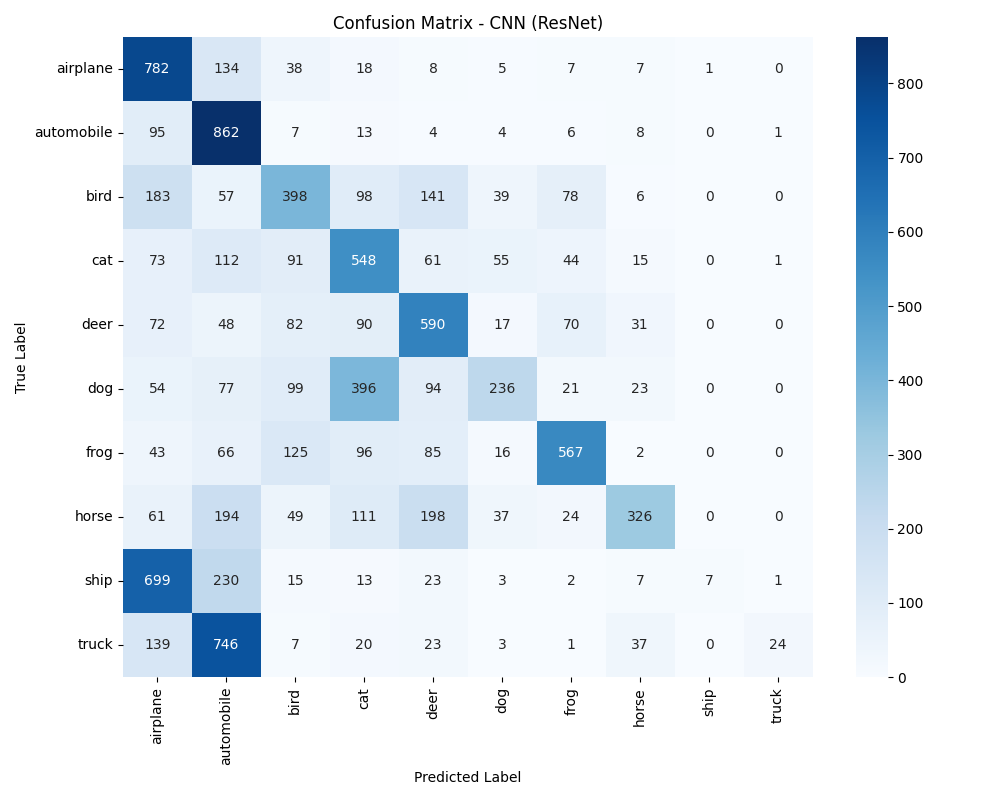


Displaying confusion_matrix_vit.png:


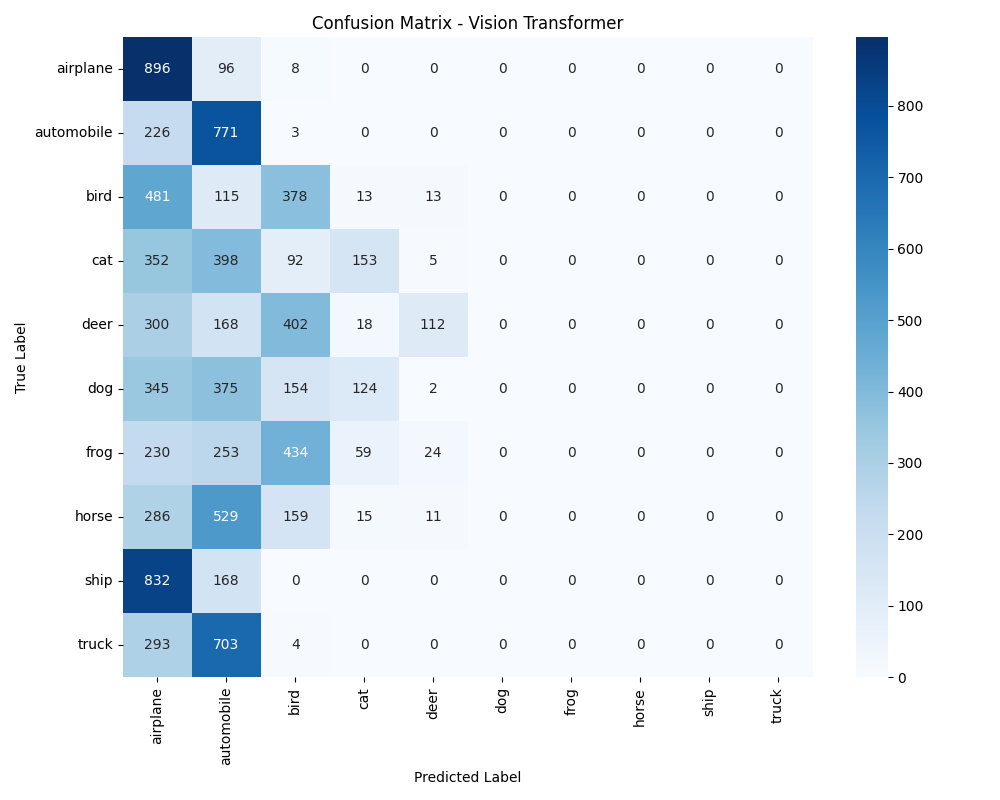


Displaying per_class_metrics_comparison.png:


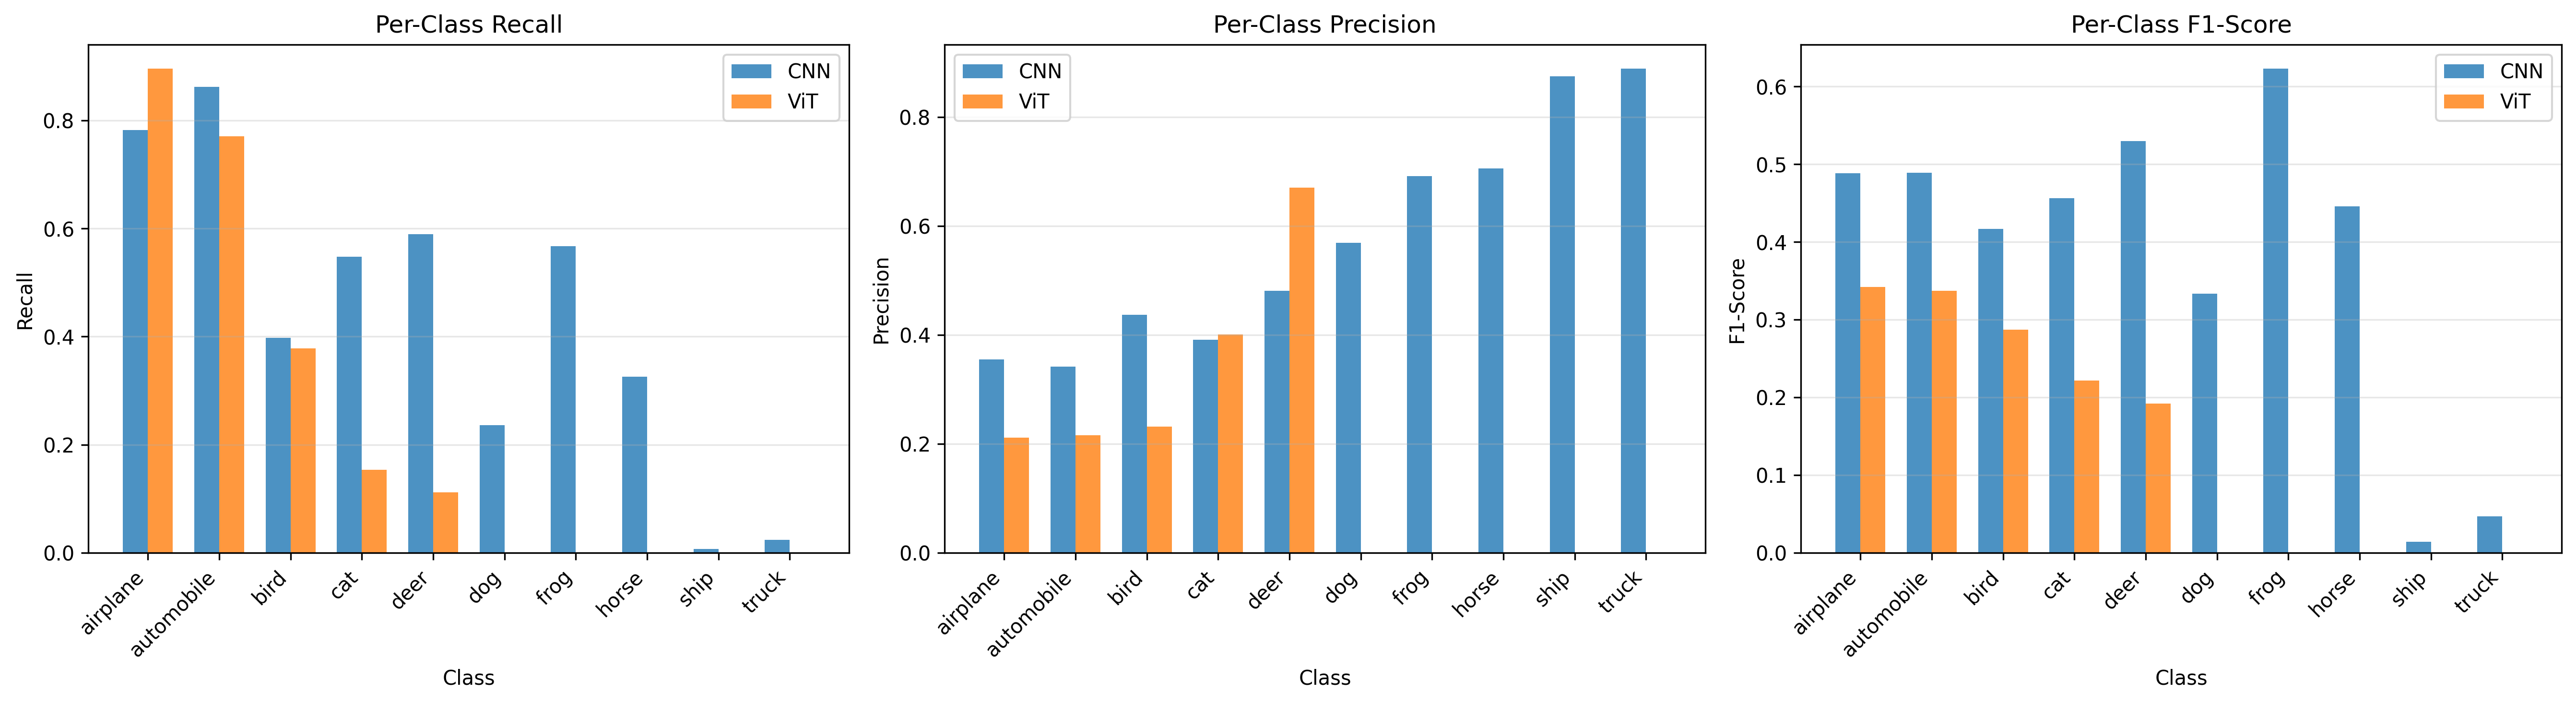


Displaying training_curves.png:


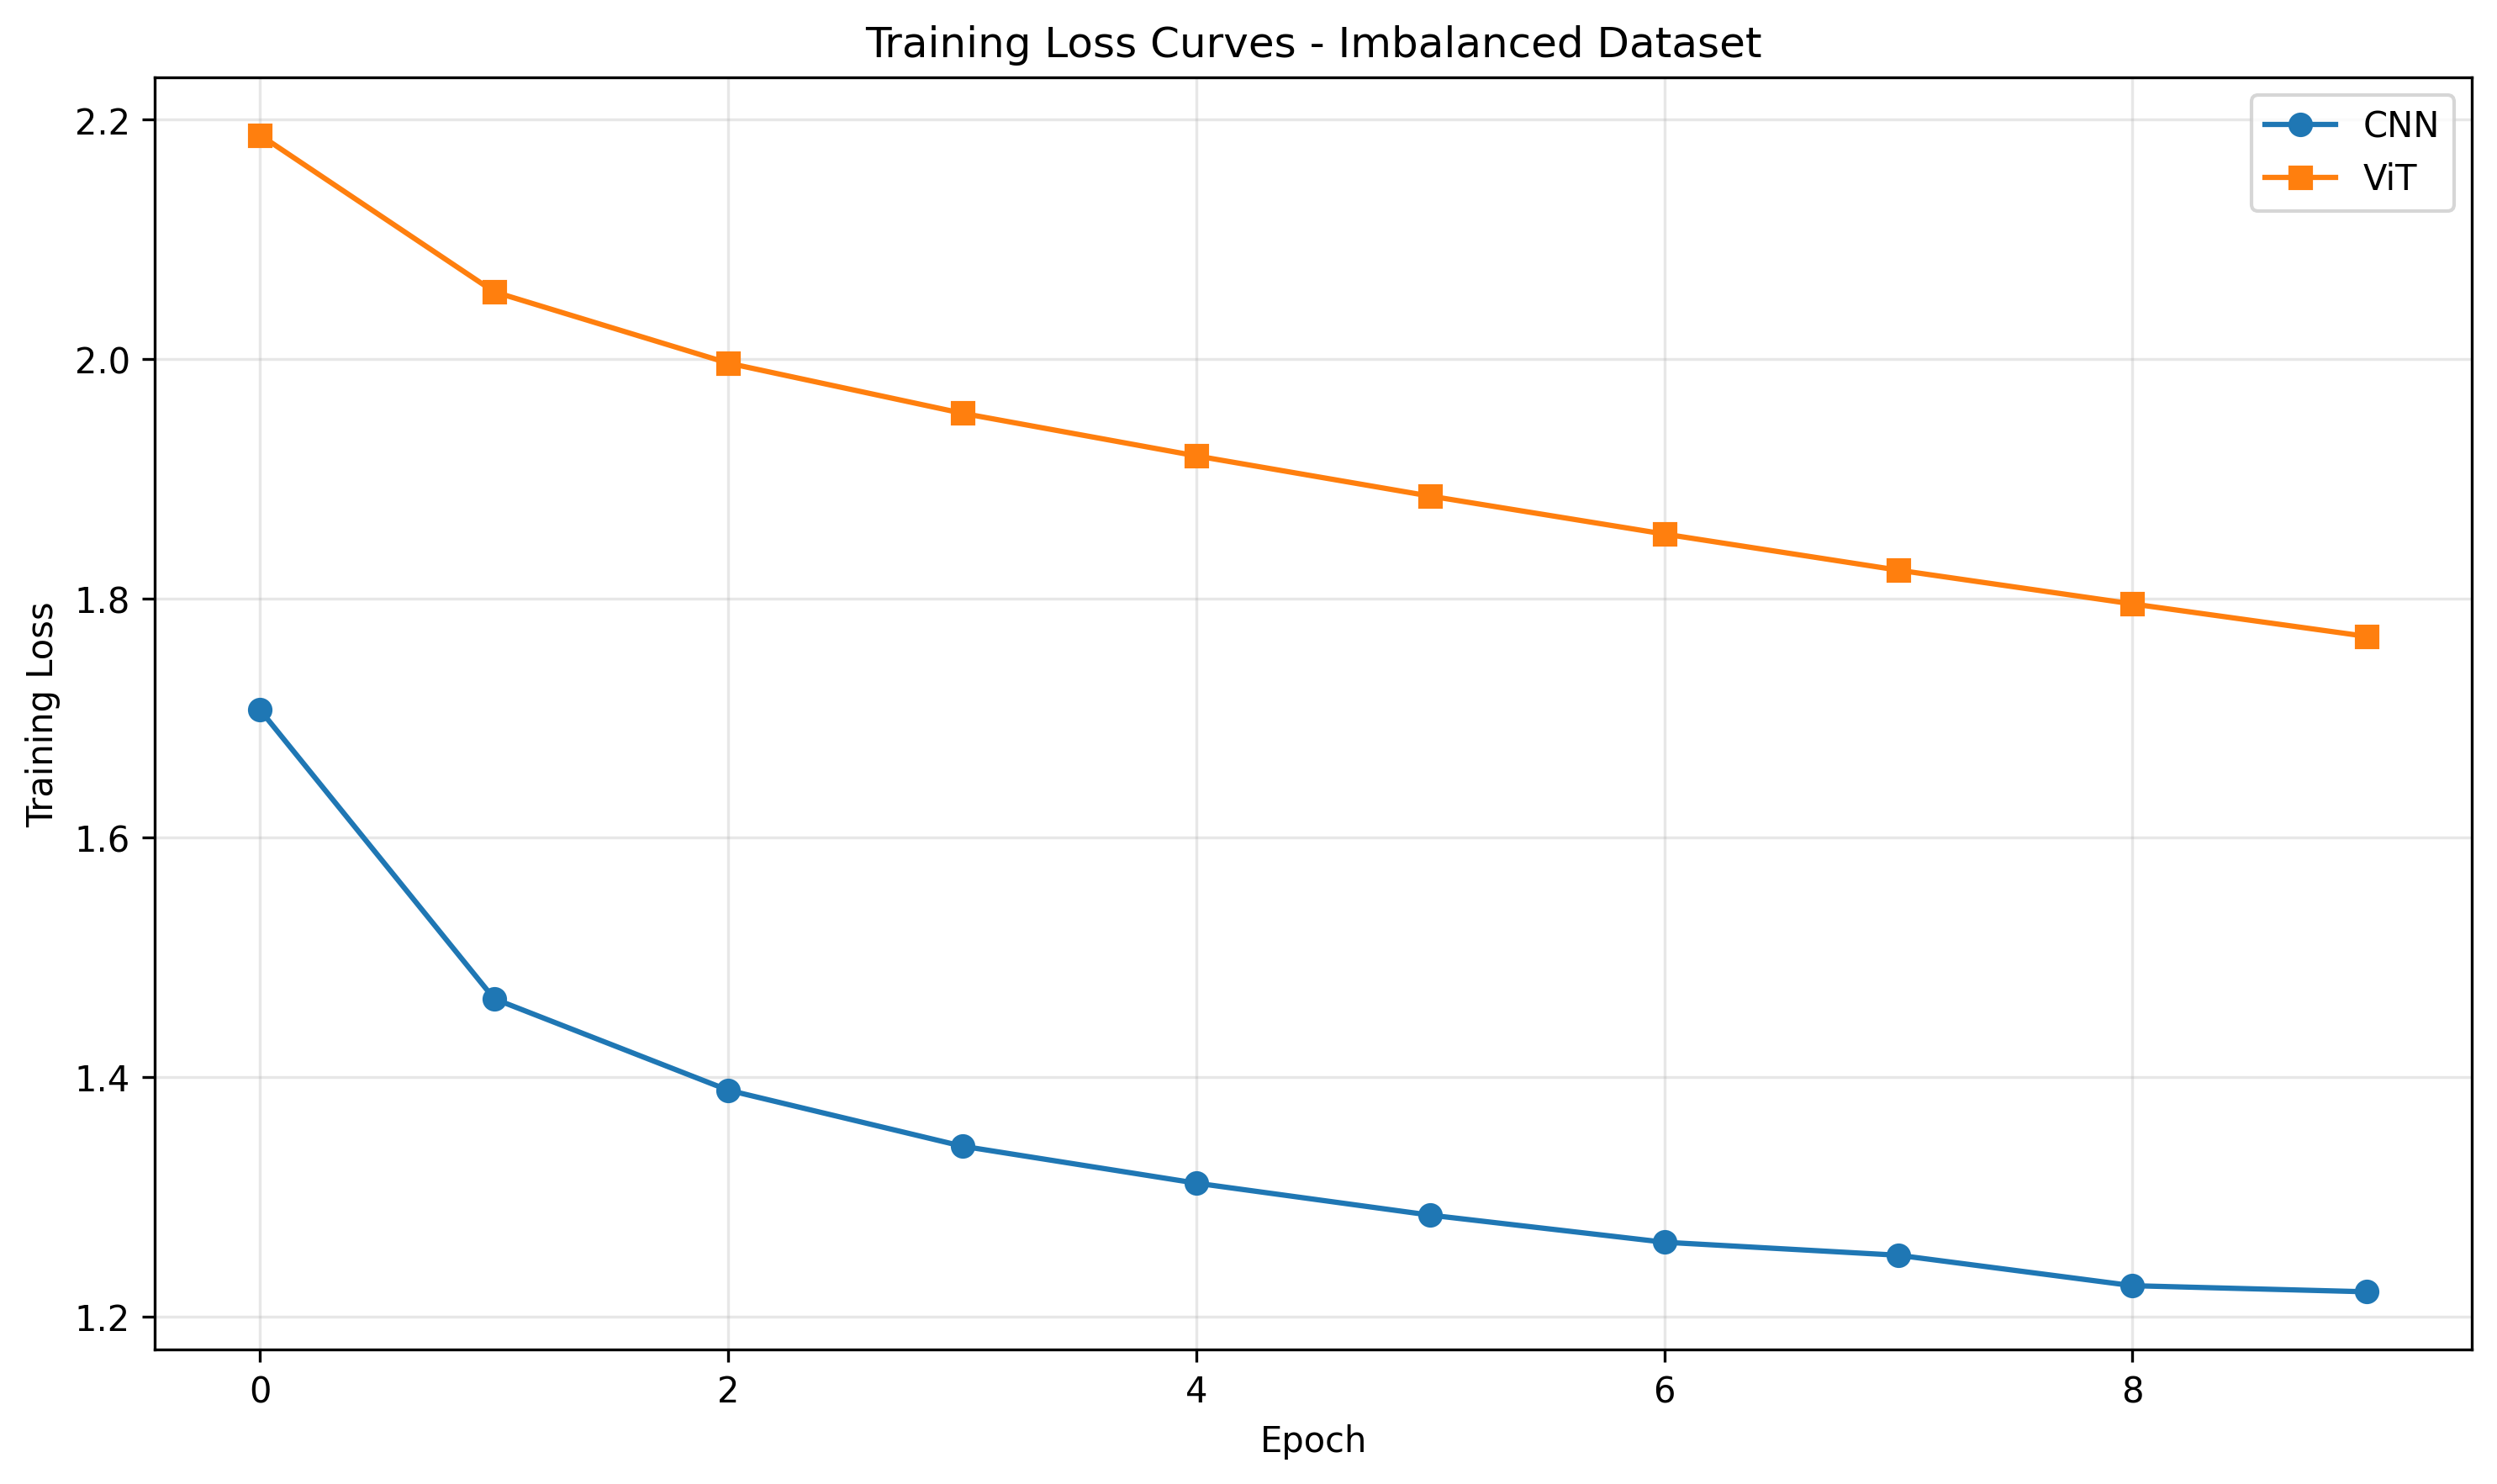

In [9]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
import glob
import json

# Find the most recent experiment directory
result_dirs = sorted(glob.glob('results/imbalanced_*'), key=os.path.getmtime, reverse=True)
if result_dirs:
    latest_dir = result_dirs[0]
    print(f"Latest experiment: {latest_dir}")

    # Display results JSON
    if os.path.exists(f"{latest_dir}/results.json"):
        with open(f"{latest_dir}/results.json", 'r') as f:
            results = json.load(f)
        print("\nExperiment Results:")
        print(f"CNN Accuracy: {results['cnn_metrics']['accuracy']*100:.2f}%")
        print(f"ViT Accuracy: {results['vit_metrics']['accuracy']*100:.2f}%")
        print(f"CNN F1-Macro: {results['cnn_metrics']['f1_macro']:.4f}")
        print(f"ViT F1-Macro: {results['vit_metrics']['f1_macro']:.4f}")

    # Display plots
    plot_files = [
        'confusion_matrix_cnn.png',
        'confusion_matrix_vit.png',
        'per_class_metrics_comparison.png',
        'training_curves.png'
    ]

    for plot_file in plot_files:
        plot_path = f"{latest_dir}/{plot_file}"
        if os.path.exists(plot_path):
            print(f"\nDisplaying {plot_file}:")
            display(Image(plot_path))
else:
    print("No experiment results found. Run the experiment first.")